In [1]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
#setting dimension of graph
plt.rcParams["figure.figsize"]= (12, 7)

import pandas as pd
import numpy as np
import seaborn as sns

# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# from sklearn.preprocessing import Imputer
# sklearn.impute.SimpleImputer

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset
url = "./marketing-data.csv"
dataset = pd.read_csv(url)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  is_success  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
is_success    0
dtype: int64

In [5]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
count = dataset.groupby('is_success').size()
percent = count/len(dataset)*100
print(percent)
print(type(percent))

is_success
no     88.30152
yes    11.69848
dtype: float64
<class 'pandas.core.series.Series'>


In [18]:
print(type(percent))
print(percent[0])

<class 'pandas.core.series.Series'>
88.30151954170445


<AxesSubplot:ylabel='None'>

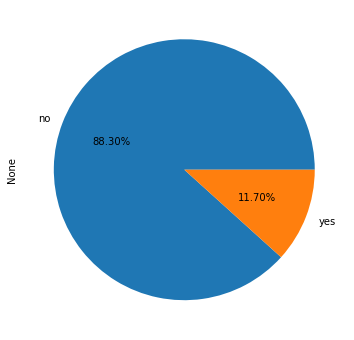

In [19]:
percent.plot(kind='pie',autopct='%.2f%%',figsize=(6,6))

In [20]:
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [21]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


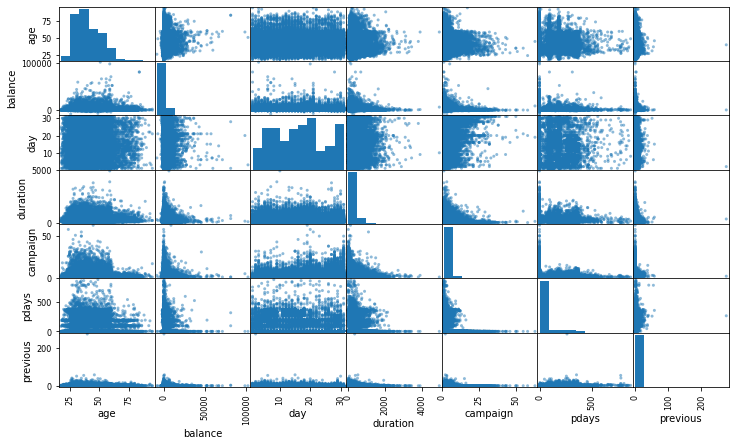

In [24]:
scatter_matrix(dataset)
plt.show()

In [27]:
# https://blog.csdn.net/Jormungand_V/article/details/109775367

In [28]:
# QL：下四分位数，表示全部观察值中有四分之一的数据取值比它大。

# QU：上四分位数，表示全部观察值中有四分之一的数据取值比它小。

# IQR：四分位数间距，是QU与QL之差，其间包含了全部观察值的一半。

<AxesSubplot:xlabel='is_success', ylabel='age'>

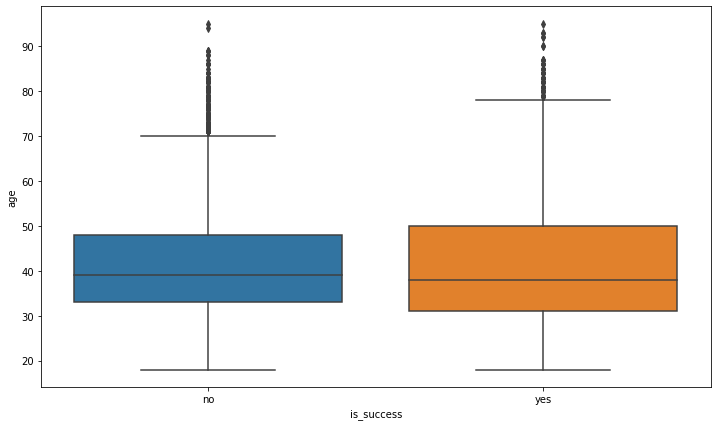

In [25]:
sns.boxplot(x='is_success', y='age', data = dataset)

In [ ]:
dataset.quantile(q=0.5)